In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
n_data = torch.ones(100,2)
print(n_data.shape)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0, x1),0).type(torch.FloatTensor)
y = torch.cat((y0, y1),).type(torch.LongTensor)
print(x.shape,y.shape)

torch.Size([100, 2])
torch.Size([200, 2]) torch.Size([200])


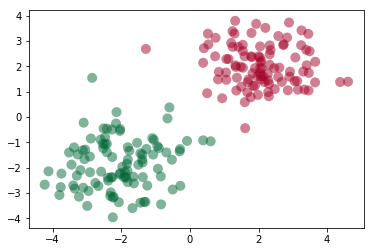

In [3]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(),s=100,lw=0,alpha=0.5,cmap='RdYlGn')
plt.show()

In [5]:
network = torch.nn.Sequential(
        torch.nn.Linear(2,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,2),
)

optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

In [9]:
for t in range(50):
    out = network(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save(network, 'net.pkl')
torch.save(network.state_dict(), 'network_parameters.pkl')

In [11]:
net2 = torch.load('net.pkl')
net2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

In [ ]:
net3 = torch.nn.Sequential(
        torch.nn.Linear(2,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,2),
)
net3.load_state_dict(torch.load('network_parameters.pkl'))